Question 1
Modelling the Travel Time

a.

Bus travel time
# Tb(x,y) = ax^2 +by^2

Gradient

# ∇T=((∂T/∂X),(∂T/∂Y))




In [50]:
import sympy as sp

x, y, a, b = sp.symbols('x y a b')

Tb = a*x**2 + b*y**2

grad_Tb = [sp.diff(Tb, x), sp.diff(Tb, y)]
grad_Tb


[2*a*x, 2*b*y]

Taxi Travel Time

# Tt(x,y)=(c(x2+y2))^1/2
​

In [51]:
c = sp.symbols('c')

Tt = sp.sqrt(c*(x**2 + y**2))
grad_Tt = [sp.diff(Tt, x), sp.diff(Tt, y)]
grad_Tt


[x*sqrt(c*(x**2 + y**2))/(x**2 + y**2), y*sqrt(c*(x**2 + y**2))/(x**2 + y**2)]

b.

For bus travel both distance and traffic have a quadratic effect so small increases in either cause large delays and for taxi travel the distance and traffic are combined inside a square root, so they affect travel time smoothly and in a more proportional way

So traffic congestion affects buses more than taxis due to stops and passenger boarding



---



Question 2 Cost analysis using integration

a.

In [52]:
t, x = sp.symbols('t x')

Fb = sp.integrate(2*t + 1, (t, 0, x))
Ft = sp.integrate(3*t + 2, (t, 0, x))

Fb, Ft


(x**2 + x, 3*x**2/2 + 2*x)

b.

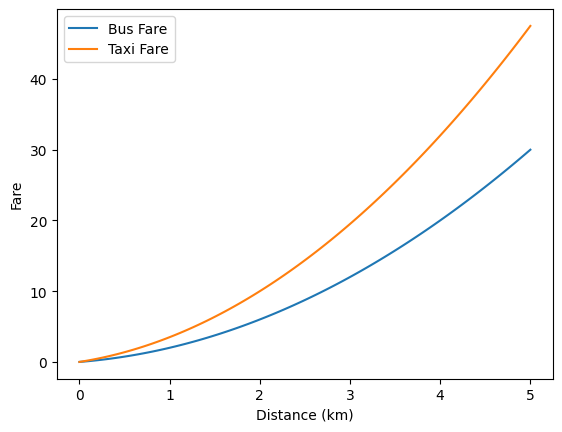

In [53]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(0, 5, 100)
Fb_vals = x_vals**2 + x_vals
Ft_vals = 1.5*x_vals**2 + 2*x_vals

plt.plot(x_vals, Fb_vals, label="Bus Fare")
plt.plot(x_vals, Ft_vals, label="Taxi Fare")
plt.xlabel("Distance (km)")
plt.ylabel("Fare")
plt.legend()
plt.show()


c.

For bus fare increases slowly with distance as it is quadratic but with smaller growth. This suggests buses are more affordable for long trips.

For taxi fare increases faster with distance as it consists higher quadratic term. This suggests that taxis are more expensive for long trips but the difference is smaller for short trips.

So buses are cheaper for all distance but taxi is much more expensive per km rather than bus even for short trips but taxi offers better convenience and comfortability.




---



Question 3 Preditcing peak travel times

a.

In [54]:
import sympy as sp

t = sp.symbols('t')

P = 5 + 4*sp.sin(sp.pi*t) - (3/2)*t**2 + (t**4)/4
P

t**4/4 - 1.5*t**2 + 4*sin(pi*t) + 5

b.

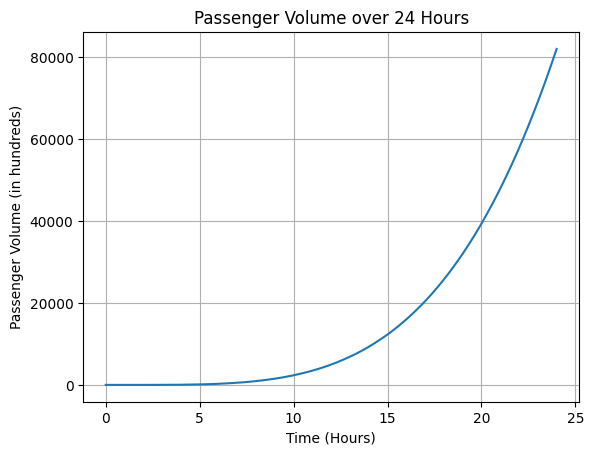

In [55]:
import numpy as np
import matplotlib.pyplot as plt

t_vals = np.linspace(0, 24, 500)
P_func = sp.lambdify(t, P, "numpy")

plt.plot(t_vals, P_func(t_vals))
plt.xlabel("Time (Hours)")
plt.ylabel("Passenger Volume (in hundreds)")
plt.title("Passenger Volume over 24 Hours")
plt.grid(True)
plt.show()


c.

The passenger volume varies over the 24-hour period due to the sinusoidal component, which represents daily commuting behaviour. However the polynomial terms influence the overall trend, causing the volume to increase significantly at later hours. The rapid rise towards the end of the day reflects a limitation of the truncated series rather than realistic passenger behaviour. Therefore while the sine term mathematically creates peaks every two hours these are not realistic morning or evening rush hours and not visible in the plot due to the overwhelming polynomial growth.



---



Question 4 Travel pattern analysis

a.

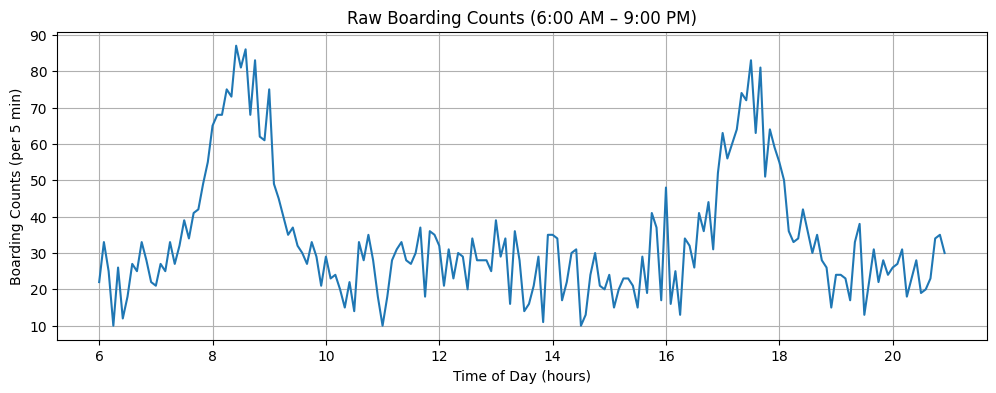

In [56]:
import numpy as np
from numpy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# Number of samples
n_samples = 180  # 180 × 5 min = 15 hours

# Simulated realistic data (morning peak ~8:30 AM, evening peak ~5:30 PM)
t_minutes = np.arange(n_samples) * 5
boarding = 25
boarding += 60 * np.exp(-((t_minutes - 150)/40)**2)   # strong morning peak
boarding += 50 * np.exp(-((t_minutes - 690)/45)**2)   # evening peak
boarding += np.random.normal(0, 7, n_samples)         # noise
boarding = np.clip(boarding, 10, 100).astype(int)     # realistic values

# Plot raw data for context
time_hours = np.arange(n_samples) * 5 / 60 + 6  # start from 6:00 AM
plt.figure(figsize=(12, 4))
plt.plot(time_hours, boarding)
plt.xlabel('Time of Day (hours)')
plt.ylabel('Boarding Counts (per 5 min)')
plt.title('Raw Boarding Counts (6:00 AM – 9:00 PM)')
plt.grid(True)
plt.show()

The raw time series data shows two clear peaks morning and evening rush hours.
Apply the Discrete Fourier Transform (DFT) using NumPy's `fft` function to analyse the frequency components.

In [57]:
# Compute the Fourier Transform
fft_vals = fft(boarding)
magnitudes = np.abs(fft_vals)

# Sampling rate: 12 samples per hour (every 5 minutes) and Frequency axis in cycles per hour
freqs = fftfreq(n_samples, d=1/12)  # d = sampling interval in hours

b.

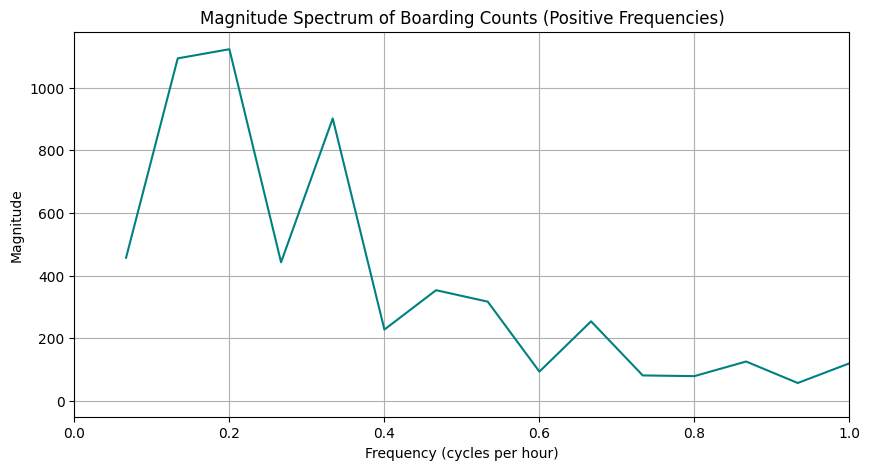

In [58]:
# Plot only positive frequencies
positive = freqs > 0

plt.figure(figsize=(10, 5))
plt.plot(freqs[positive], magnitudes[positive], color='teal')
plt.xlabel('Frequency (cycles per hour)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Boarding Counts (Positive Frequencies)')
plt.xlim(0, 1)  # Focuses on low frequencies (etc daily patterns)
plt.grid(True)
plt.show()


The magnitude spectrum shows strong peaks at low frequencies corresponding to periods of roughly 5–10 hours.
These dominant low-frequency components shows the daily cyclical pattern with two main rush periods:


Morning rush (approximately 8–9 AM) and the Evening rush (approximately 5–6 PM)

In [59]:
# Identify and print top 5 dominant positive frequencies (exclude the DC component)
indices = np.argsort(magnitudes)[-6:-1]  # skip the zero-frequency peak

print("Top 5 dominant positive frequencies:")
print("Frequency (cycles/hour)    Period (hours)    Magnitude")
for idx in indices:
    if freqs[idx] > 0:
        period = 1 / freqs[idx]
        print(f"{freqs[idx]:18.4f}        {period:12.2f}     {magnitudes[idx]:10.1f}")

Top 5 dominant positive frequencies:
Frequency (cycles/hour)    Period (hours)    Magnitude
            0.3333                3.00          901.9
            0.1333                7.50         1093.6
            0.2000                5.00         1122.8


c.

The dominant low frequency peaks clearly identifies regular morning (around 8–9 AM) and evening (around 5–6 PM) rush hours.

This information allows to optimise the scheduling:
* Allowing more buses and taxis during peak periods to reduce waiting times and overcrowding
* Running fewer vehicles during off peak hours (eg. midday) to minimise the operational costs.

Overall the Fourier analysis provides a data driven way to match vehicle supply with passenger demand patterns which improving efficiency and service quality.



---



Queston 5 Image propressing

a.

Image loaded successfully. Shape: (181, 278, 3)


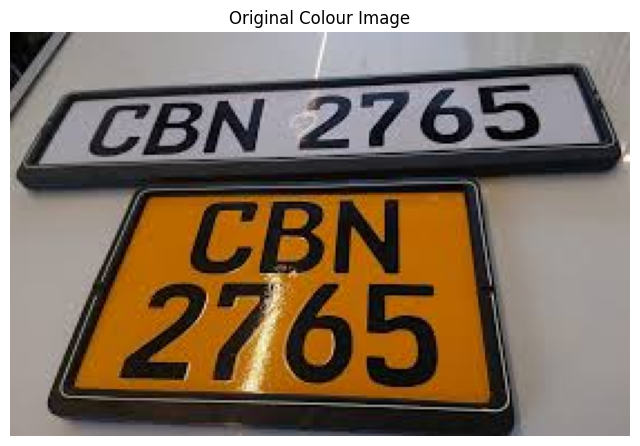

Top plate classification: FRONT - White background
Bottom plate classification: BACK (Rear) - Yellow background


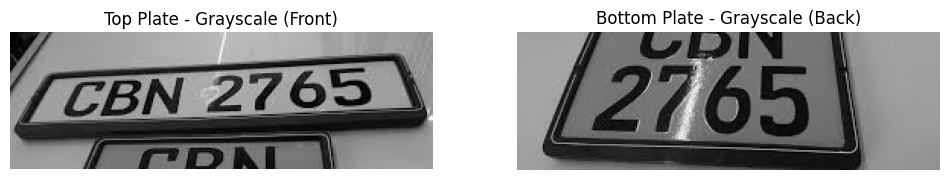

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the colour image
img = cv2.imread("ehicle_plate.png")

if img is None:
    raise FileNotFoundError("Image 'vehicle_plate.png' not found. Check the filename.")

print("Image loaded successfully. Shape:", img.shape)

# Convert BGR to RGB for correct colour display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display original colour image
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title("Original Colour Image")
plt.axis("off")
plt.show()


# Separate the two plates
height, width, _ = img.shape
mid_y = height // 2

top_plate_color = img[0:mid_y, :, :]        # Top: front plate (white background)
bottom_plate_color = img[mid_y:, :, :]     # Bottom: back plate (yellow background)

# Convert each plate to grayscale
top_gray = cv2.cvtColor(top_plate_color, cv2.COLOR_BGR2GRAY)
bottom_gray = cv2.cvtColor(bottom_plate_color, cv2.COLOR_BGR2GRAY)

# Function to classify front vs back using HSV colour space
def classify_plate(color_img):
    hsv = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)
    mean_hue = np.mean(hsv[:, :, 0])
    mean_saturation = np.mean(hsv[:, :, 1])
    if 15 < mean_hue < 40 and mean_saturation > 80:
        return "BACK (Rear) - Yellow background"
    else:
        return "FRONT - White background"

# Results
print("Top plate classification:", classify_plate(top_plate_color))
print("Bottom plate classification:", classify_plate(bottom_plate_color))

# Display grayscale versions side-by-side
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(top_gray, cmap="gray")
plt.title("Top Plate - Grayscale (Front)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(bottom_gray, cmap="gray")
plt.title("Bottom Plate - Grayscale (Back)")
plt.axis("off")
plt.show()

b.

2D Fourier Transform (FFT)

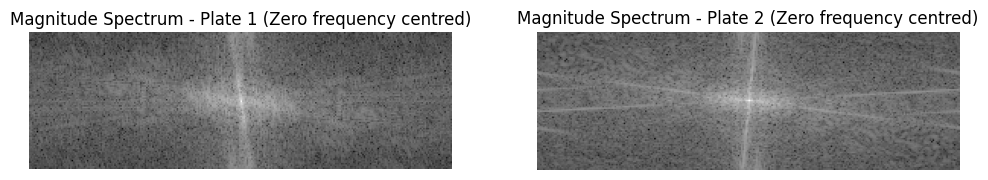

In [61]:
# Compute and display magnitude spectrum for each plate
plt.figure(figsize=(12, 5))

for i, gray_plate in enumerate([top_gray, bottom_gray], 1):
    # 2D FFT
    f = np.fft.fft2(gray_plate)
    fshift = np.fft.fftshift(f)  # Shift zero frequency to centre

    # Magnitude spectrum (log scale for better visualisation)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

    plt.subplot(1, 2, i)
    plt.imshow(magnitude_spectrum, cmap="gray")
    plt.title(f"Magnitude Spectrum - Plate {i} (Zero frequency centred)")
    plt.axis("off")

plt.show()

2D Discrete Cosine Transform (DCT)

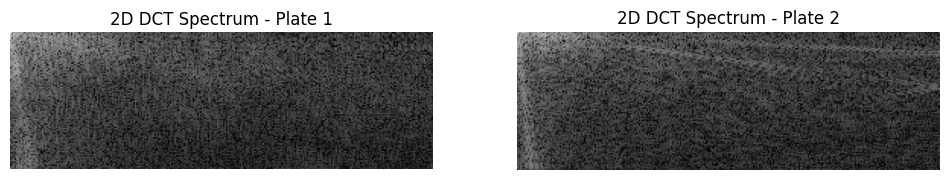

In [62]:
from scipy.fftpack import dct, idct

# Compute and display 2D DCT for each plate
plt.figure(figsize=(12, 5))

for i, gray_plate in enumerate([top_gray, bottom_gray], 1):
    # Apply 2D DCT (Type 2)
    # We apply dct on rows, then on columns
    dct_2d = dct(dct(gray_plate.T, norm='ortho').T, norm='ortho')

    # Log scale for visualisation because low-frequency values are very large
    dct_visual = np.log(np.abs(dct_2d) + 1)

    plt.subplot(1, 2, i)
    plt.imshow(dct_visual, cmap="gray")
    plt.title(f"2D DCT Spectrum - Plate {i}")
    plt.axis("off")

plt.show()

c.

Detected 0 license plates.


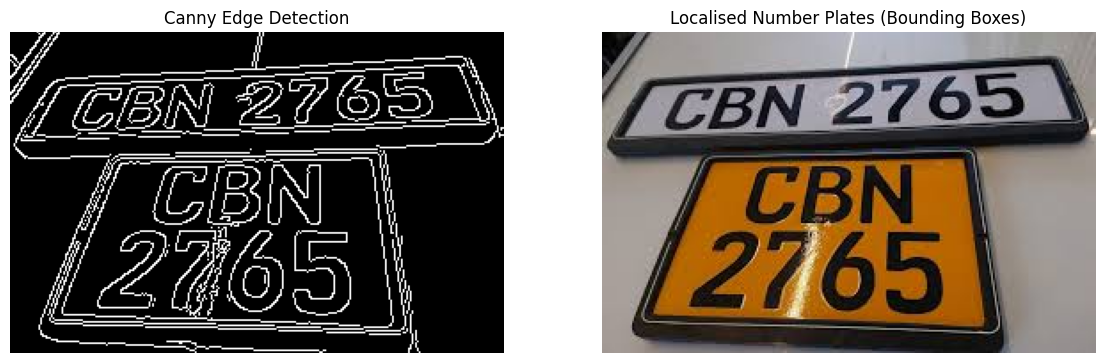

In [63]:
# Work on the full image
full_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Edge detection with Canny
edges = cv2.Canny(full_gray, 100, 200)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copy original RGB image for drawing
localized = img_rgb.copy()

# Filter and draw bounding boxes around detected plates
detected_count = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 5000:  # Minimum area threshold
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
        if len(approx) == 4:  # Rectangular shape
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(localized, (x, y), (x + w, y + h), (0, 255, 0), 4)
            cv2.putText(localized, "Plate", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
            detected_count += 1

print(f"Detected {detected_count} license plates.")

# Display results
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(localized)
plt.title("Localised Number Plates (Bounding Boxes)")
plt.axis("off")
plt.show()

d.

1.Fourier Transform (FFT):
* The bright cross pattern at the center indicates strong horizontal and vertical edges from the plate border and character alignment.
* Scattered high frequency components represents fine text details and noise.
* The similarity between both plate spectra confirms consistent font and layout.

2.Discrete Cosine Transform (DCT):
* Most information concentrated in the top left (the low frequency) coefficients.
* Reflects the smooth background regions of the plate.
* High frequency coefficients (the bottom right) captures text edges and fine details.

FFT is translation invariant the plate movement changes phase but not magnitude, making detection robust under shifting.
DCT is excellent for compression (for JPEG standard) and efficient feature extraction due to energy compaction.
Both enables efficient storage (DCT) and robust recognition (FFT) in automated systems.

Traffic optimisation applications:
ANPR systems enable vehicle counting, speed monitoring, and congestion detection in real time further the collected data helps to optimise traffic signals, identify peak hours, plan better routes, enforce low-emission zones and improve overall traffic flow.